### Importing necessary library

In [1]:
import pandas as pd
import numpy as np

import datetime

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest, chi2

### Reading the cleaned data file

In [2]:
rent_df = pd.read_csv('../Data/canada_rent_clean.csv')
rent_df.head(5)

,city,province,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,furnishing,availability_date,smoking,cats,dogs
0,Airdrie,Alberta,51.305962,-114.012515,Long Term,Townhouse,2495,2,2.5,1403,Unfurnished,2025-02-22,Non-Smoking,True,True
1,Airdrie,Alberta,51.305962,-114.012515,Long Term,Townhouse,2695,3,2.5,1496,Unfurnished,2025-02-22,Non-Smoking,True,True
2,Airdrie,Alberta,51.305962,-114.012515,Long Term,Townhouse,2295,2,2.5,1180,Unfurnished,2025-02-22,Non-Smoking,True,True
3,Airdrie,Alberta,51.305962,-114.012515,Long Term,Townhouse,2095,2,2.5,1403,Unfurnished,2025-11-18,Non-Smoking,True,True
4,Airdrie,Alberta,51.305962,-114.012515,Long Term,Townhouse,2495,2,2.5,1403,Unfurnished,2025-02-22,Non-Smoking,True,True


In [3]:
rent_df[rent_df.isna()].sum()

city                   0
province               0
latitude             0.0
longitude            0.0
lease_term             0
type                   0
price                0.0
beds                 0.0
baths                0.0
sq_feet              0.0
furnishing             0
availability_date      0
smoking                0
cats                   0
dogs                   0
dtype: object

### Removing unrepresented population type 
---
As we have seen previously in the Data_Analysis.ipynb, not all province are represented equally in the sample dataset.
A certain amount of data is need to be representative of a population. 

---
I will be building my model and testing all my subsequent models on only these four province.
- Alberta
- Ontario
- Quebec
- British Columbia

In [4]:
# province2keep = [ 'Alberta'] #, 'Ontario', 'Quebec', 'British Columbia']

# rent_df = rent_df_or[rent_df_or['province'].isin(province2keep)]

# rent_df['province'].unique()

# rent_df
prov = rent_df['province'].unique()

In [5]:
rent_df[rent_df.isna()].sum()

city                   0
province               0
latitude             0.0
longitude            0.0
lease_term             0
type                   0
price                0.0
beds                 0.0
baths                0.0
sq_feet              0.0
furnishing             0
availability_date      0
smoking                0
cats                   0
dogs                   0
dtype: object

### Removing unecessary columns
---
As we have seen previously in the Cleaning_Data.ipynb, we well not be working with city name, since it would create tons of encoded columns. For simplicity, we will be working with latitude and longitude.

So, I will be removing the city column at this point.

---

I also will be removing the availability_date column, since I don't believe that this can affect the price.

In [6]:
rent_df = rent_df.drop(columns = ['availability_date', 'city'])

rent_df

,province,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,furnishing,smoking,cats,dogs
0,Alberta,51.305962,-114.012515,Long Term,Townhouse,2495,2,2.5,1403,Unfurnished,Non-Smoking,True,True
1,Alberta,51.305962,-114.012515,Long Term,Townhouse,2695,3,2.5,1496,Unfurnished,Non-Smoking,True,True
2,Alberta,51.305962,-114.012515,Long Term,Townhouse,2295,2,2.5,1180,Unfurnished,Non-Smoking,True,True
3,Alberta,51.305962,-114.012515,Long Term,Townhouse,2095,2,2.5,1403,Unfurnished,Non-Smoking,True,True
4,Alberta,51.305962,-114.012515,Long Term,Townhouse,2495,2,2.5,1403,Unfurnished,Non-Smoking,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24414,Saskatchewan,51.203024,-102.484782,Long Term,Apartment,920,0,1.0,400,Unfurnished,Non-Smoking,True,True
24415,Saskatchewan,51.203024,-102.484782,Long Term,Apartment,1450,3,1.0,810,Unfurnished,Non-Smoking,True,True
24416,Saskatchewan,51.202667,-102.485765,Long Term,Apartment,1125,1,1.0,520,Unfurnished,Non-Smoking,True,True
24417,Saskatchewan,51.202667,-102.485765,Long Term,Apartment,920,0,1.0,400,Unfurnished,Non-Smoking,True,True


### Encoding nominal categorical columns

---
As we have seen previously in the Data_Analysis.ipynb, there are five category columns. I believe from the five categorical column 4 are nominal.
  * lease_term
  * type
  * furnishing
  * smoking

In [7]:
# Create instance of OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output = False) #, handle_unknown="ignore")

# Encode the categorical columns
encoded_cols = encoder.fit_transform(rent_df[['lease_term', 'type',
                                              'furnishing', 'smoking','province']])

# Put the encoded column into a dataframe
tmp_df = pd.DataFrame(encoded_cols, columns = encoder.get_feature_names_out(['lease_term', 
                                                                             'type',
                                                                             'furnishing',
                                                                             'smoking',
                                                                             'province']))


# Removing categorical columns
rent_df = rent_df.drop(columns=['lease_term', 'type',
                                'furnishing', 'smoking', 'province'])

# Join encoded dataframe to the rent_df dataframe
rent_df = rent_df.join(tmp_df)

rent_df.head()

,latitude,longitude,price,beds,baths,sq_feet,cats,dogs,lease_term_6 months,lease_term_Long Term,...,smoking_Smoking Allowed,province_British Columbia,province_Manitoba,province_New Brunswick,province_Newfoundland and Labrador,province_Northwest Territories,province_Nova Scotia,province_Ontario,province_Quebec,province_Saskatchewan
0,51.305962,-114.012515,2495,2,2.5,1403,True,True,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,51.305962,-114.012515,2695,3,2.5,1496,True,True,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,51.305962,-114.012515,2295,2,2.5,1180,True,True,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,51.305962,-114.012515,2095,2,2.5,1403,True,True,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,51.305962,-114.012515,2495,2,2.5,1403,True,True,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
tmp_df[tmp_df.isna()].sum()

lease_term_6 months                   0.0
lease_term_Long Term                  0.0
lease_term_Negotiable                 0.0
lease_term_Short Term                 0.0
lease_term_months                     0.0
type_Basement                         0.0
type_Condo Unit                       0.0
type_Duplex                           0.0
type_House                            0.0
type_Loft                             0.0
type_Main Floor                       0.0
type_Mobile                           0.0
type_Room For Rent                    0.0
type_Townhouse                        0.0
type_Vacation Home                    0.0
furnishing_Negotiable                 0.0
furnishing_Unfurnished                0.0
smoking_Smoking Allowed               0.0
province_British Columbia             0.0
province_Manitoba                     0.0
province_New Brunswick                0.0
province_Newfoundland and Labrador    0.0
province_Northwest Territories        0.0
province_Nova Scotia              

In [9]:
tmp_df.dropna(axis=1)

,lease_term_6 months,lease_term_Long Term,lease_term_Negotiable,lease_term_Short Term,lease_term_months,type_Basement,type_Condo Unit,type_Duplex,type_House,type_Loft,...,smoking_Smoking Allowed,province_British Columbia,province_Manitoba,province_New Brunswick,province_Newfoundland and Labrador,province_Northwest Territories,province_Nova Scotia,province_Ontario,province_Quebec,province_Saskatchewan
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24414,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
24415,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
24416,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
24417,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Removing categorical columns that are not available in each province
---
In order for an independent variable to be used as a predictor it must be avaialble in every sample population

In [10]:
rent_df[rent_df.isna()].sum()
#rent_df = rent_df.dropna(axis=1)

latitude                              0.0
longitude                             0.0
price                                 0.0
beds                                  0.0
baths                                 0.0
sq_feet                               0.0
cats                                    0
dogs                                    0
lease_term_6 months                   0.0
lease_term_Long Term                  0.0
lease_term_Negotiable                 0.0
lease_term_Short Term                 0.0
lease_term_months                     0.0
type_Basement                         0.0
type_Condo Unit                       0.0
type_Duplex                           0.0
type_House                            0.0
type_Loft                             0.0
type_Main Floor                       0.0
type_Mobile                           0.0
type_Room For Rent                    0.0
type_Townhouse                        0.0
type_Vacation Home                    0.0
furnishing_Negotiable             

### Encoding ordinal categorical columns

---
As we have seen previously in the Data_Analysis.ipynb, there are five categorical columns. I believe that the province can be classified as an ordinal categorical columns based on the amount of adds there are in the dataset for each province.

1- Alberta
2- Ontario
3- Quebec
4- British Columbia  
     ... and so on

     

In [11]:
# count = rent_df.groupby(['province'])['beds'].count().sort_values(ascending=False)

# rank = {province: rank for rank, province in enumerate(count.index, start=1)}

# rent_df["province_numeric"] = rent_df["province"].map(rank)

# tmp_df = rent_df.copy()
# rent_df = rent_df.drop(columns='province')

# rent_df.head(5)

### Investigating the correlation

---
**Low correlation (red & green)**

**High correlation (blue & purple)**

**Medium correlation (blue & purple)**


Conclusion : 
- Latitude and Longitude are highly co-correlated.
- Dogs and cats are highly co-correlated
- Lease term negociable and long term are highly co-correlated


- Beds and Baths are moderately co-correlated

There is no independent feature that is a unremarkably well correlated to price.
Beds and baths are moderately correlated to price.
The next features that are better correlayed to price but low correlation (not near 0) are : type_house, latitude, longitude, type_basement, sq_feet


In [12]:
rent_df.sum()

latitude                              1.192876e+06
longitude                            -2.442245e+06
price                                 5.342703e+07
beds                                  4.298100e+04
baths                                 3.462650e+04
sq_feet                               2.260904e+07
cats                                  1.581200e+04
dogs                                  1.515800e+04
lease_term_6 months                   2.000000e+00
lease_term_Long Term                  2.260600e+04
lease_term_Negotiable                 1.381000e+03
lease_term_Short Term                 3.370000e+02
lease_term_months                     2.000000e+00
type_Basement                         1.657000e+03
type_Condo Unit                       2.251000e+03
type_Duplex                           4.910000e+02
type_House                            1.603000e+03
type_Loft                             2.200000e+01
type_Main Floor                       8.100000e+02
type_Mobile                    

In [13]:
# Compute correlation
corr = rent_df.select_dtypes(include=[float, int]).corr()

In [14]:
corr

,latitude,longitude,price,beds,baths,sq_feet,lease_term_6 months,lease_term_Long Term,lease_term_Negotiable,lease_term_Short Term,...,smoking_Smoking Allowed,province_British Columbia,province_Manitoba,province_New Brunswick,province_Newfoundland and Labrador,province_Northwest Territories,province_Nova Scotia,province_Ontario,province_Quebec,province_Saskatchewan
latitude,1.000000,-0.890686,-0.245520,0.203685,0.174731,0.062177,0.006365,-0.185981,0.173902,0.051420,...,0.035475,0.036471,0.054491,-0.014509,-0.007808,0.107215,-0.111275,-0.809008,-0.288437,0.127746
longitude,-0.890686,1.000000,0.136291,-0.216369,-0.200584,-0.075388,-0.009332,0.201901,-0.187696,-0.054597,...,-0.025127,-0.278636,0.030210,0.037623,0.058353,-0.022879,0.195363,0.706797,0.464937,-0.056805
price,-0.245520,0.136291,1.000000,0.412160,0.486310,0.122934,0.007115,-0.034142,-0.019108,0.096091,...,-0.040094,0.078014,-0.093854,-0.009703,-0.026067,-0.009322,0.040514,0.207175,-0.016105,-0.151728
beds,0.203685,-0.216369,0.412160,1.000000,0.674759,0.262606,0.002235,-0.073791,0.067395,0.021261,...,0.022023,-0.066815,-0.031524,-0.004044,-0.011646,0.004122,-0.016782,-0.159651,-0.106761,-0.040063
baths,0.174731,-0.200584,0.486310,0.674759,1.000000,0.224148,0.011473,-0.071315,0.059758,0.021463,...,-0.007739,-0.036470,-0.029352,-0.005728,-0.014123,-0.013873,-0.006239,-0.138908,-0.107385,-0.081921
sq_feet,0.062177,-0.075388,0.122934,0.262606,0.224148,1.000000,0.001977,-0.081637,0.083676,0.012409,...,-0.001458,-0.023328,-0.017950,0.000287,-0.006486,-0.016876,-0.001075,-0.060221,-0.027956,-0.036432
lease_term_6 months,0.006365,-0.009332,0.007115,0.002235,0.011473,0.001977,1.000000,-0.031958,-0.002216,-0.001071,...,-0.000955,0.019467,-0.001735,-0.000174,-0.000201,-0.000259,-0.000873,-0.005432,-0.002865,-0.001570
lease_term_Long Term,-0.185981,0.201901,-0.034142,-0.073791,-0.071315,-0.081637,-0.031958,1.000000,-0.864545,-0.417717,...,-0.044937,0.035193,0.049235,0.005438,0.006279,0.008108,0.015866,0.160770,0.077158,0.045403
lease_term_Negotiable,0.173902,-0.187696,-0.019108,0.067395,0.059758,0.083676,-0.002216,-0.864545,1.000000,-0.028963,...,0.047197,-0.035627,-0.046947,-0.004701,-0.005429,-0.007010,-0.023611,-0.143334,-0.076886,-0.039302
lease_term_Short Term,0.051420,-0.054597,0.096091,0.021261,0.021463,0.012409,-0.001071,-0.417717,-0.028963,1.000000,...,0.011056,-0.016162,-0.011296,-0.002271,-0.002623,-0.003387,0.014309,-0.057477,-0.010606,-0.018431


In [29]:
# Convert array to dataframe for visualisation purposes
pd.DataFrame(corr['price']).sort_values(by='price', ascending=False)

,price
price,1.000000
baths,0.486310
beds,0.412160
type_House,0.278362
province_Ontario,0.207175
longitude,0.136291
sq_feet,0.122934
lease_term_Short Term,0.096091
province_British Columbia,0.078014
type_Townhouse,0.062579


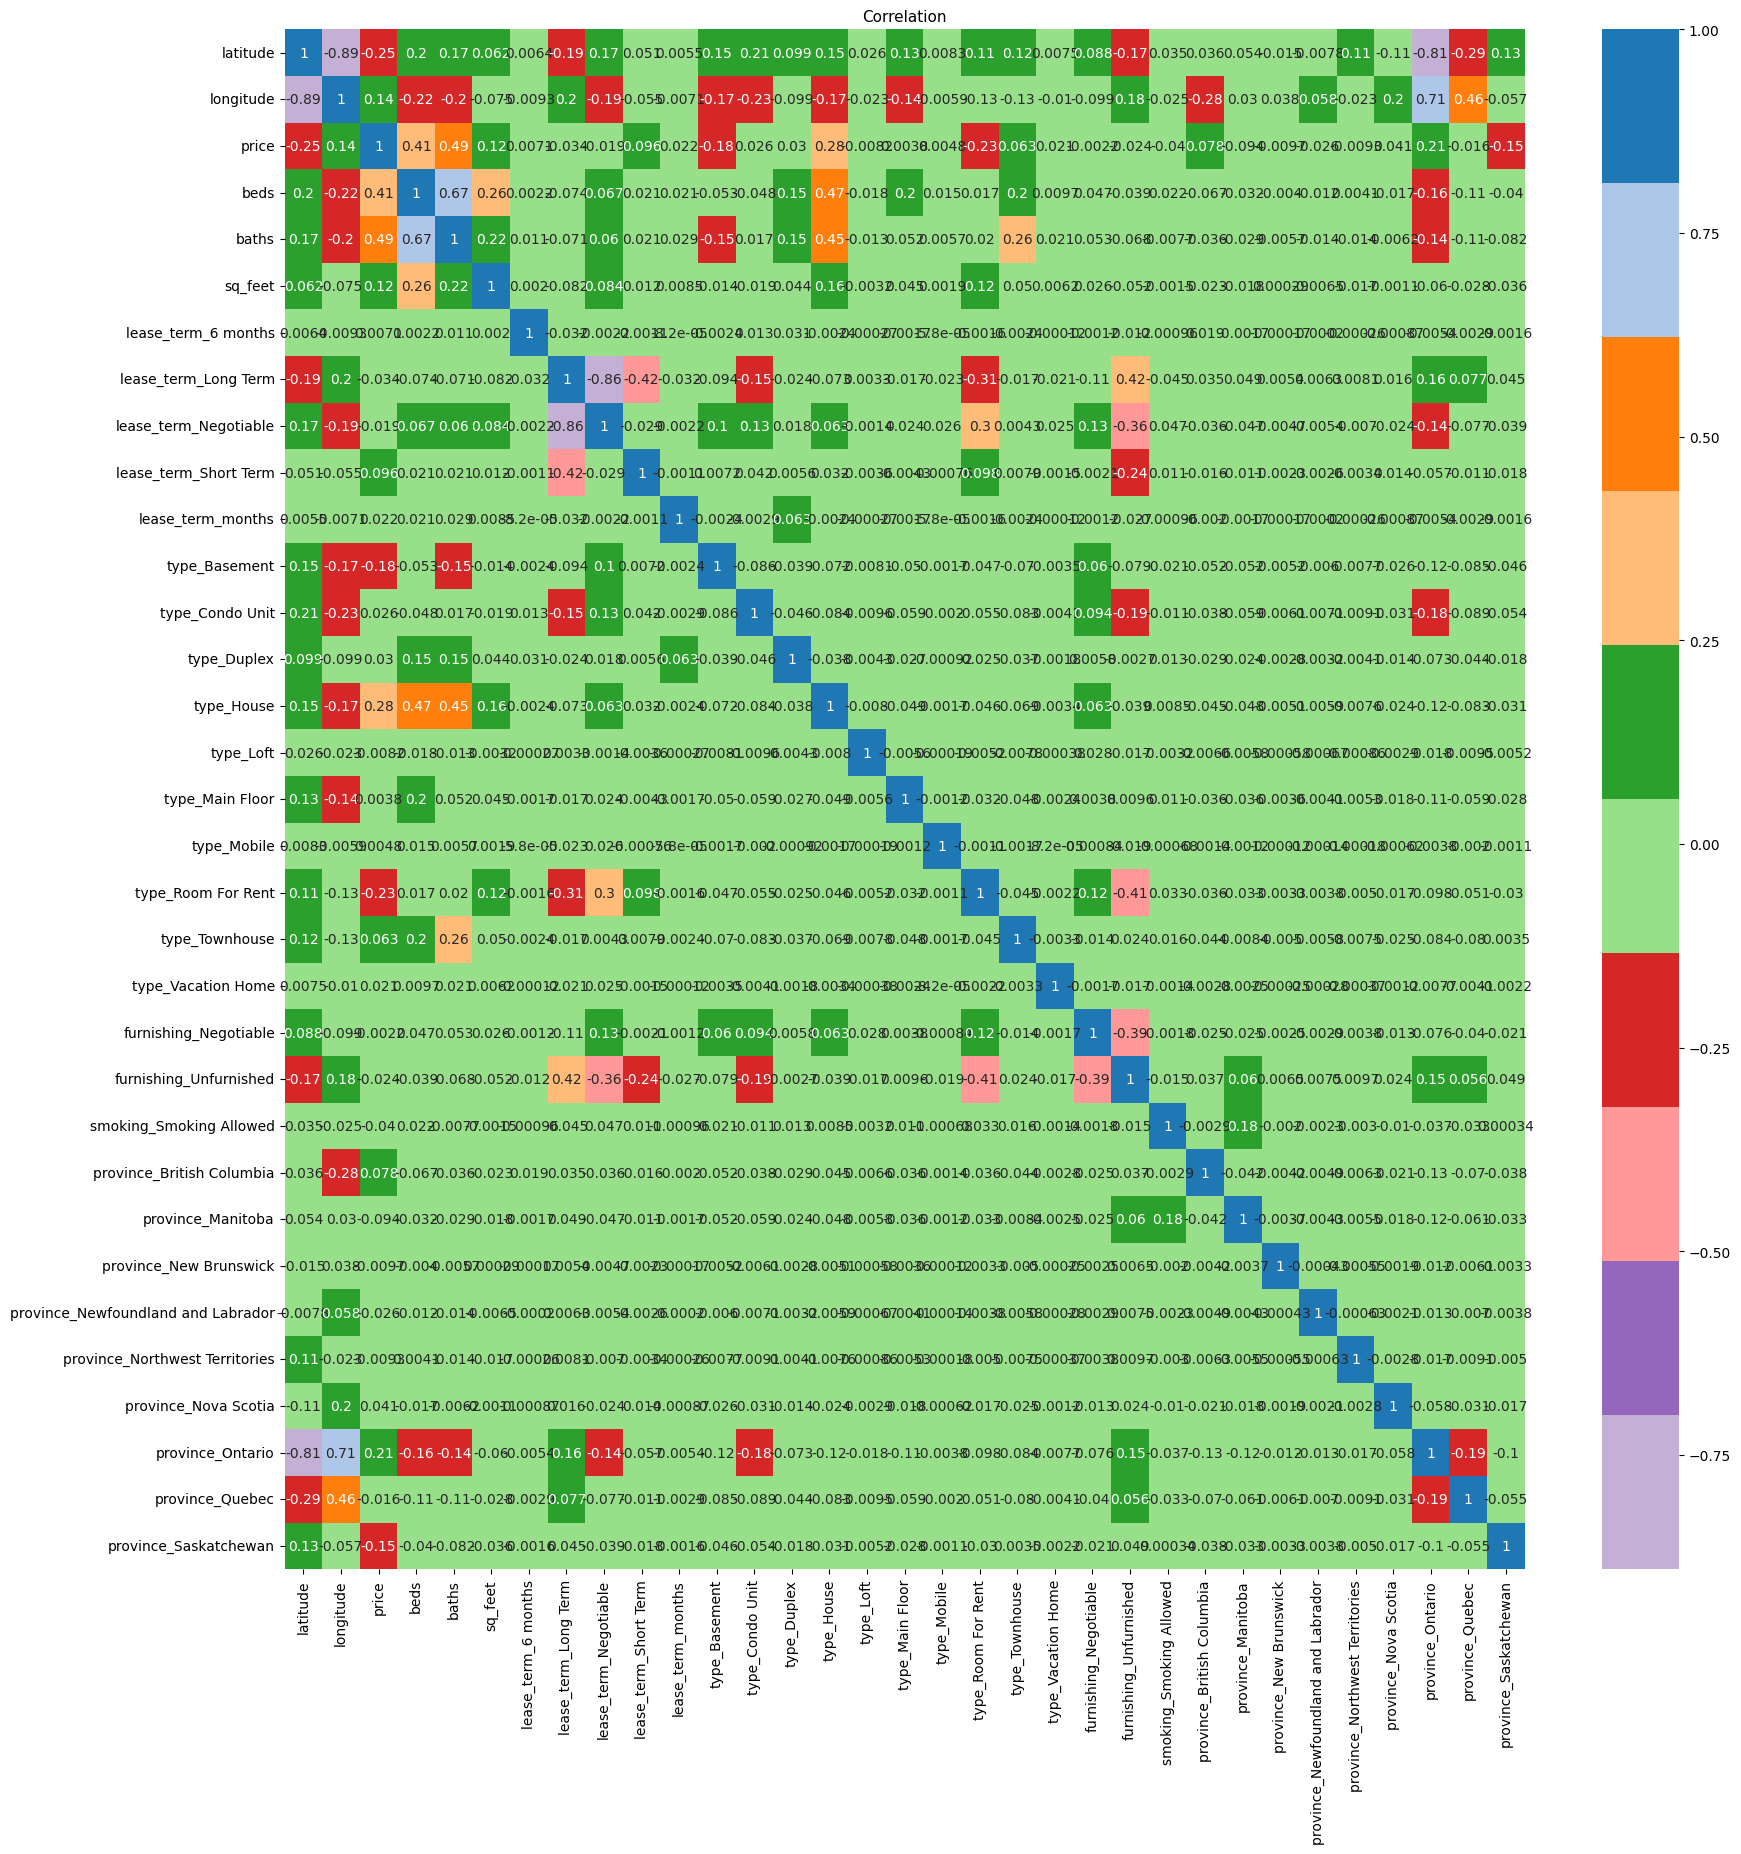

In [16]:
# Heatmap

# Create the figure and adjust its size
plt.figure(figsize = (20, 20))

# I want to use a discrete color palette
# to identify easily values close to 1 and 0
palette = sns.color_palette("tab20",10)
palette.reverse()

# Create the box plot
ax = sns.heatmap(data=corr, annot=True, cmap=palette) 

# Set the title
ax.set_title('Correlation', fontsize = 11)

# Saving the plot t be able to zoom in
plt.savefig('../Graph/Correlation_heatmap.png')

# Show plot
plt.show()

### Splitting the dataset into training vs testing dataset

In [17]:
# Need to turn longitude to positive to used SelectKBest
# We are only considering Canada. So, all longitude are negative.
# There is no positive values on our dataset.
rent_df['longitude'] = abs(rent_df['longitude'])

In [18]:
rent_df = rent_df.reset_index(drop=True)

In [19]:
# Separate independent variable from dependent variable
X = rent_df.drop(['price'], axis=1)
y = rent_df['price']

# Split data into training/testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Save the data
X_train.to_csv('../Data/X_Training_Can.csv', index=False)
X_test.to_csv('../Data/X_Testing_Can.csv', index=False)
y_train.to_csv('../Data/y_Training_Can.csv', index=False)
y_test.to_csv('../Data/y_Testing_Can.csv', index=False)


In [20]:
y_train[y_train.isna()].sum()

np.int64(0)

In [21]:
X_train[X_train.isna()].sum()
print(np.isinf(X_train).sum())  
print(X_train.dtypes)
print(X_train.applymap(lambda x: isinstance(x, str)).sum()) 
print(X_train.isna().sum().sum())
print(X_train[X_train.isnull()].count())

latitude                              0
longitude                             0
beds                                  0
baths                                 0
sq_feet                               0
cats                                  0
dogs                                  0
lease_term_6 months                   0
lease_term_Long Term                  0
lease_term_Negotiable                 0
lease_term_Short Term                 0
lease_term_months                     0
type_Basement                         0
type_Condo Unit                       0
type_Duplex                           0
type_House                            0
type_Loft                             0
type_Main Floor                       0
type_Mobile                           0
type_Room For Rent                    0
type_Townhouse                        0
type_Vacation Home                    0
furnishing_Negotiable                 0
furnishing_Unfurnished                0
smoking_Smoking Allowed               0


/tmp/ipykernel_319748/4269902708.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(X_train.applymap(lambda x: isinstance(x, str)).sum())


### Find the best independent features to predict with

In [22]:
len(X.columns)

34

In [23]:
# Initialize SelectKBest with chi2, choose top 5 features
selector = SelectKBest(score_func=chi2, k=5)

# Fit and transform training data only
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the selected feature names
selected_features = selector.get_feature_names_out(X.columns)

# View top 5 features
print('The top 5 best independent features are :', selected_features)

The top 5 best independent features are : ['longitude' 'sq_feet' 'type_Basement' 'type_Room For Rent'
 'province_Manitoba']


In [24]:
# Initialize SelectKBest with chi2, choose top 10 features
selector = SelectKBest(score_func=chi2, k=10)

# Fit and transform training data only
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the selected feature names
selected_features = selector.get_feature_names_out(X.columns)

# View top 10 features
print('The top 10 best independent features are :', selected_features)

The top 10 best independent features are : ['longitude' 'beds' 'sq_feet' 'lease_term_6 months' 'type_Basement'
 'type_House' 'type_Room For Rent' 'province_Manitoba' 'province_Ontario'
 'province_Saskatchewan']


In [25]:
# Initialize SelectKBest with chi2, choose top 15 features
selector = SelectKBest(score_func=chi2, k=15)

# Fit and transform training data only
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the selected feature names
selected_features = selector.get_feature_names_out(X.columns)

# View top 15 features
print('The top 15 best independent features are :', selected_features)

The top 15 best independent features are : ['longitude' 'beds' 'baths' 'sq_feet' 'lease_term_6 months'
 'lease_term_Short Term' 'type_Basement' 'type_House' 'type_Room For Rent'
 'province_British Columbia' 'province_Manitoba'
 'province_Newfoundland and Labrador' 'province_Ontario' 'province_Quebec'
 'province_Saskatchewan']


In [26]:
# Initialize SelectKBest with chi2, choose top 20 features
selector = SelectKBest(score_func=chi2, k=20)

# Fit and transform training data only
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the selected feature names
selected_features = selector.get_feature_names_out(X.columns)

# View top 20 features
print('The top 20 best independent features are :', selected_features)

The top 20 best independent features are : ['longitude' 'beds' 'baths' 'sq_feet' 'lease_term_6 months'
 'lease_term_Negotiable' 'lease_term_Short Term' 'type_Basement'
 'type_Condo Unit' 'type_House' 'type_Room For Rent' 'type_Townhouse'
 'smoking_Smoking Allowed' 'province_British Columbia' 'province_Manitoba'
 'province_Newfoundland and Labrador' 'province_Nova Scotia'
 'province_Ontario' 'province_Quebec' 'province_Saskatchewan']
